In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
Data=pd.read_excel('/content/drive/MyDrive/Labelled Reddit Data.xlsx')

In [3]:
Data.head()

,Unnamed: 0,Lemma,clusters,Manual Label,MANUAL,Match,Word_Count,Unnamed: 7,Unnamed: 8
0,0,Megathread Joe Biden Projected Defeat Presid...,0,1,True,NaN,12,NaN,NaN
1,1,Mitch McConnell Lose Control Senate Democrat...,1,1,True,NaN,9,"Note: 0=FALSE , 1=TRUE",NaN
2,2,Megathread House Votes Impeach President Don...,0,1,True,NaN,8,NaN,NaN
3,3,Trump Threatens Leave Country Loses Biden,0,1,True,NaN,6,NaN,NaN
4,9,Virginia governor make Election Day holiday ...,1,1,True,NaN,9,NaN,NaN


In [4]:
from imblearn.over_sampling import RandomOverSampler
X = Data['Lemma']
y = Data['Manual Label']
oversample = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = oversample.fit_resample(X.values.reshape(-1, 1), y)
oversampled_data = pd.DataFrame({'text': X_resampled.ravel(), 'manual_label': y_resampled})

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [6]:
X_train = [str(x) for x in X_train]
X_val = [str(x) for x in X_val]

In [7]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

In [8]:
max_length = max([len(seq) for seq in X_train_seq])
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_length, padding='post')

In [9]:
model = Sequential()
model.add(Dense(32, input_dim=max_length, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
model.fit(X_train_pad, y_train, epochs=50, batch_size=32, validation_data=(X_val_pad, y_val))

Epoch 1/50
72/72 [==============================] - 2s 6ms/step - loss: 37.4665 - accuracy: 0.4873 - val_loss: 21.4203 - val_accuracy: 0.4684
Epoch 2/50
72/72 [==============================] - 0s 3ms/step - loss: 15.5268 - accuracy: 0.5342 - val_loss: 12.4665 - val_accuracy: 0.5867
Epoch 3/50
72/72 [==============================] - 0s 4ms/step - loss: 9.7518 - accuracy: 0.5779 - val_loss: 8.7314 - val_accuracy: 0.5878
Epoch 4/50
72/72 [==============================] - 0s 4ms/step - loss: 6.6035 - accuracy: 0.6086 - val_loss: 6.6277 - val_accuracy: 0.6388
Epoch 5/50
72/72 [==============================] - 0s 4ms/step - loss: 4.9898 - accuracy: 0.6410 - val_loss: 5.5815 - val_accuracy: 0.6255
Epoch 6/50
72/72 [==============================] - 0s 4ms/step - loss: 3.8702 - accuracy: 0.6883 - val_loss: 4.7109 - val_accuracy: 0.6786
Epoch 7/50
72/72 [==============================] - 0s 4ms/step - loss: 3.1408 - accuracy: 0.7080 - val_loss: 4.0992 - val_accuracy: 0.6980
Epoch 8/50
72/72

In [12]:
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_length, padding='post')
y_pred = model.predict(X_val_pad)

31/31 [==============================] - 0s 1ms/step


In [13]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [14]:
print(y_pred)

[[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]


In [26]:
from sklearn.metrics import classification_report
y_pred_labels = np.argmax(y_pred, axis=1)
target_names = ['False', 'True']
print(classification_report(y_val, y_pred_labels, target_names=target_names))

              precision    recall  f1-score   support

       False       0.48      1.00      0.65       472
        True       0.00      0.00      0.00       508

    accuracy                           0.48       980
   macro avg       0.24      0.50      0.33       980
weighted avg       0.23      0.48      0.31       980



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train.ravel())
X_val = vectorizer.transform(X_val.ravel())

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
y_pred2 = rf.predict(X_val)
print(classification_report(y_val, y_pred2))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       472
           1       1.00      0.96      0.98       508

    accuracy                           0.98       980
   macro avg       0.98      0.98      0.98       980
weighted avg       0.98      0.98      0.98       980



In [20]:
Data2=pd.read_excel('/content/drive/MyDrive/FYP VIVA Presentation/unlabelled data2.xlsx')

In [21]:
Data2.head()

,Unnamed: 0,Lemma,clusters,MANUAL,Match,Word_Count,Unnamed: 6
0,4,Demands Kushner Resign Staggering Level Depr...,1,-,NaN,28,NaN
1,5,million people sign petition call KKK declar...,1,-,NaN,9,Note: For match the green means it matches wit...
2,6,Report Biden Admin Discovers Trump Zero Plan...,0,-,NaN,10,NaN
3,7,Biden Pennsylvania lead big enough avoid aut...,1,-,NaN,8,NaN
4,8,Donald Trump Left White House Time Good,0,-,NaN,7,NaN


In [22]:
X_test = Data2['Lemma']
X_test_transformed = vectorizer.transform(X_test)
y_pred_test = rf.predict(X_test_transformed)


In [23]:
y_pred_test.shape

(6645,)

In [24]:
y_true=Data2['clusters']

In [27]:
print(classification_report(y_true, y_pred_test))

              precision    recall  f1-score   support

           0       0.31      0.11      0.17       880
           1       0.88      0.96      0.92      5765

    accuracy                           0.85      6645
   macro avg       0.59      0.54      0.54      6645
weighted avg       0.80      0.85      0.82      6645



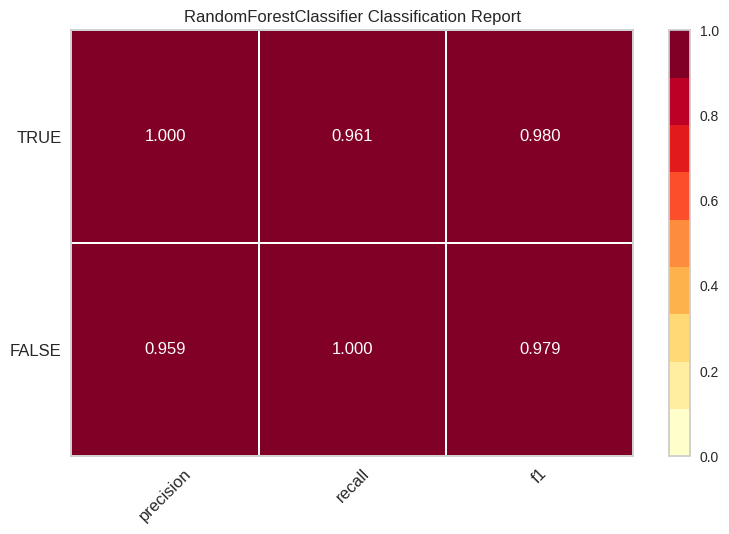

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [29]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(rf, classes=['FALSE', 'TRUE'])
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)
visualizer.show()

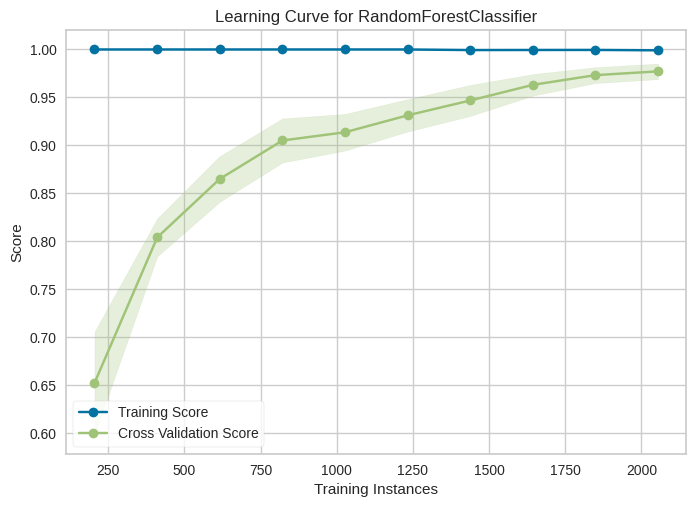

<Axes: title={'center': 'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [30]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

lc_viz = LearningCurve(
    rf, cv=cv, scoring='f1_weighted', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

lc_viz.fit(X_train, y_train)
lc_viz.show()

In [ ]:
#from imblearn.over_sampling import RandomOverSampler
#X1 = Data2['Lemma']
#y1 = Data2['clusters']
#oversample = RandomOverSampler(sampling_strategy='minority')
#X_resampled1, y_resampled1 = oversample.fit_resample(X1.values.reshape(-1, 1), y1)
#oversampled_data = pd.DataFrame({'text': X_resampled1.ravel(), 'manual_label': y_resampled1})

In [ ]:
#X_train1, X_val1, y_train1, y_val1 = train_test_split(X_resampled1, y_resampled1, test_size=0.3, random_state=42)

In [ ]:
#X_train1 = [str(x) for x in X_train1]
#X_val1 = [str(x) for x in X_val1]
#vectorizer = CountVectorizer()
#X_train_vect = vectorizer.fit_transform(X_train1)
#X_test_vect = vectorizer.transform(X_val1)

In [ ]:
#rf.fit(X_train_vect, y_train1)


RandomForestClassifier()

In [ ]:
#y_pred3 = rf.predict(X_test_vect)

In [ ]:
#print(classification_report(y_val1, y_pred3))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1709
           1       1.00      0.99      1.00      1750

    accuracy                           1.00      3459
   macro avg       1.00      1.00      1.00      3459
weighted avg       1.00      1.00      1.00      3459



In [ ]:
#X_clustered = Data2.loc[X_test.index.max()+1:]['Lemma']
#X_clustered_vect = vectorizer.transform(X_clustered)
#y_clustered_pred = rf.predict(X_clustered_vect)